In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
sehwag = pd.read_csv("sehwag.csv")
dravid = pd.read_csv("dravid.csv")

In [3]:
sehwag.shape

(245, 14)

In [4]:
dravid.shape

(318, 14)

In [5]:
sehwag

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,15,21,15,2,0,100.00,2,caught,1,NaN,v Sri Lanka,Hambantota,24 Jul 2012,ODI # 3292
241,3,6,6,0,0,50.00,2,caught,2,NaN,v Sri Lanka,Colombo (RPS),28 Jul 2012,ODI # 3293
242,34,46,29,6,0,117.24,2,caught,2,NaN,v Sri Lanka,Colombo (RPS),31 Jul 2012,ODI # 3294
243,4,20,11,1,0,36.36,2,bowled,1,NaN,v Pakistan,Chennai,30 Dec 2012,ODI # 3314


In [6]:
p_25=np.percentile(sehwag["Runs"],25) # percentile of Q1
p_25

8.0

In [7]:
p_50=np.percentile(sehwag["Runs"],50) # percentile of Q2
p_50

23.0

In [8]:
p_75=np.percentile(sehwag["Runs"],75) # percentile of Q3
p_75

46.0

In [9]:
iqr=p_75-p_25
iqr

38.0

In [10]:
range1=(sehwag["Runs"].max()-sehwag["Runs"].min())
range1

219

In [11]:
sehwag["Runs"].quantile(.25)

8.0

In [13]:
sehwag["Runs"].quantile(.5)

23.0

In [14]:
sehwag["Runs"].quantile(.75)

46.0

In [21]:
lower= max(p_25-(1.5*iqr),sehwag["Runs"].min())
lower

0

In [22]:
upper= min(p_75+(1.5*iqr),sehwag["Runs"].max())
upper

103.0

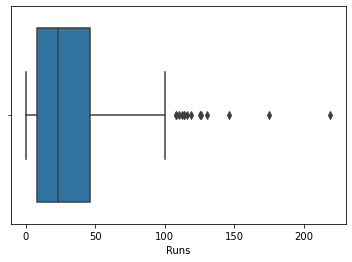

In [23]:
sns.boxplot(x=sehwag["Runs"])
plt.show()

In [26]:
sehwags_outlier= sehwag[sehwag["Runs"]>upper]
sehwags_outlier["Runs"].shape

(14,)

In [28]:
sehwag.shape

(245, 14)

In [29]:
14/245

0.05714285714285714

In [36]:
describe_d=dravid["Runs"].describe()
describe_d

count    318.000000
mean      34.242138
std       29.681822
min        0.000000
25%       10.000000
50%       26.000000
75%       54.000000
max      153.000000
Name: Runs, dtype: float64

In [38]:
describe_d.loc["max"]

153.0

In [31]:
d_25=dravid["Runs"].quantile(.25)
d_50=dravid["Runs"].quantile(.5)
d_75=dravid["Runs"].quantile(.75)
print(d_25,d_50,d_75)

10.0 26.0 54.0


In [39]:
lower_d=max(d_25-(1.5*iqr),dravid["Runs"].min())

upper_d=min(d_75+(1.5*iqr),dravid["Runs"].max())
iqr_d=upper_d-lower_d
iqr_d

111.0

In [41]:
dravid_outlier= dravid[dravid["Runs"]>upper_d]
dravid_outlier["Runs"].shape

(4,)

In [42]:
dravid.shape

(318, 14)

In [44]:
4/318

0.012578616352201259

In [45]:
data=pd.read_html("https://www.espncricinfo.com/records/most-runs-in-career-282827")
data

[                    Player       Span  Mat  Inns  NO  Runs    HS    Ave    BF  \
 0            V Kohli (IND)  2010-2022  115   107  31  4008  122*  52.73  2905   
 1          RG Sharma (IND)  2007-2022  148   140  17  3853   118  31.32  2767   
 2          MJ Guptill (NZ)  2009-2022  122   118   7  3531   105  31.81  2602   
 3         Babar Azam (PAK)  2016-2023  104    98  14  3485   122  41.48  2714   
 4        PR Stirling (IRE)  2009-2023  124   123   9  3275  115*  28.72  2410   
 ..                     ...        ...  ...   ...  ..   ...   ...    ...   ...   
 95   Riazat Ali Shah (UGA)  2019-2023   48    43  13  1075   98*  35.83   832   
 96       LD Chandimal (SL)  2010-2022   68    61   7  1062   66*  19.66  1025   
 97        Ahmed Faiz (MAL)  2019-2023   48    43   5  1057    86  27.81   858   
 98    Jatinder Singh (OMA)  2015-2022   46    46   6  1056   73*  26.40   899   
 99  HE van der Dussen (SA)  2018-2022   41    37   8  1044   94*  36.00   811   
 
         SR 10

In [46]:
type(data)

list

In [48]:
data[0]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli (IND),2010-2022,115,107,31,4008,122*,52.73,2905,137.96,1,37,4,356,117
1,RG Sharma (IND),2007-2022,148,140,17,3853,118,31.32,2767,139.24,4,29,10,348,182
2,MJ Guptill (NZ),2009-2022,122,118,7,3531,105,31.81,2602,135.70,2,20,3,309,173
3,Babar Azam (PAK),2016-2023,104,98,14,3485,122,41.48,2714,128.40,3,30,5,371,53
4,PR Stirling (IRE),2009-2023,124,123,9,3275,115*,28.72,2410,135.89,1,22,12,374,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Riazat Ali Shah (UGA),2019-2023,48,43,13,1075,98*,35.83,832,129.20,-,4,3,77,50
96,LD Chandimal (SL),2010-2022,68,61,7,1062,66*,19.66,1025,103.60,-,6,-,90,22
97,Ahmed Faiz (MAL),2019-2023,48,43,5,1057,86,27.81,858,123.19,-,5,2,85,40
98,Jatinder Singh (OMA),2015-2022,46,46,6,1056,73*,26.40,899,117.46,-,5,3,107,21


In [49]:
!ls 

04_Descriptive_Statistics_Notebook.ipynb
05_Descriptive_Statistics_Notebook.ipynb
05_Descriptive_Statistics_Notebook.pdf
05_Descriptive_Statistics_Scribble_Notes.pdf
05_Descriptive_Statistics_Typed_Notes.pdf
dravid.csv
sehwag.csv
weight-height.csv


In [50]:
df_hw=pd.read_csv("weight-height.csv")
df_hw

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [51]:
df_hw["Height"]

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [52]:
df_hw["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

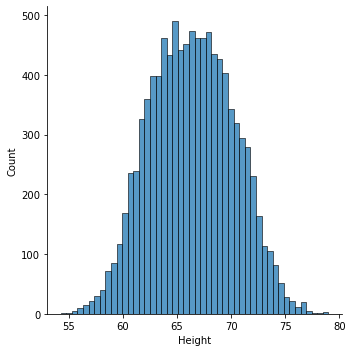

In [53]:
sns.displot(df_hw["Height"])

<AxesSubplot:xlabel='Height', ylabel='Density'>

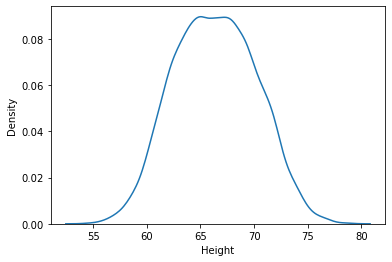

In [54]:
sns.kdeplot(df_hw["Height"])

In [55]:
df_hw["Height"]

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [61]:
e=ECDF(df_hw["Height"])

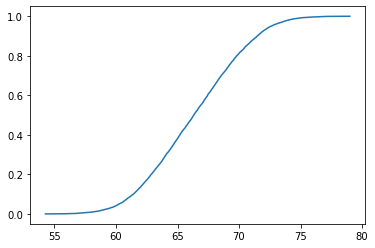

In [62]:
plt.plot(e.x,e.y)

In [67]:
min_height= df_hw["Height"].min()
max_height= df_hw["Height"].max()
max_height

78.9987423463896

In [68]:
df_height=df_hw["Height"]

In [65]:
x_values=np.linspace(min_height,max_height,1000)
y_values=[]

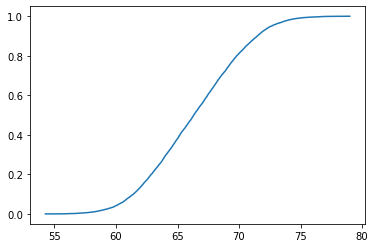

In [72]:
x_values=np.linspace(min_height,max_height,1000)
y_values=[]
for x in x_values:
    people_shorter_than_x = df_height[df_height<=x]
    num_people_shorter_than_x= len(people_shorter_than_x)
    frac_people_shorter_than_x=num_people_shorter_than_x/df_height.shape[0]
    y_values.append(frac_people_shorter_than_x)
plt.plot(x_values,y_values)

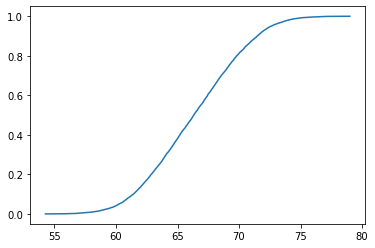

In [73]:
plt.plot(e.x,e.y)